### Gerekli Kütühane ve Fonksiyonlar

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score,roc_auc_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

#### Veri Seti Hikayesi ve Problem: Şeker Hastalığı Tahmini

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head() #outcome şeker hastası ise 1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Lojistik Regresyon( Logistic Regression)

#### Model & Tahmin

In [6]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.describe().T # .T transpozu

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
y = df["Outcome"] #bağımlı değişken

In [7]:
X = df.drop(["Outcome"],axis=1) # bağımız değişkenler

In [8]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [85]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [68]:
loj_model = LogisticRegression(solver= "liblinear").fit(X,y) #farklı yöntemler var

In [69]:
loj_model.intercept_

array([-5.89159518])

In [70]:
loj_model.coef_ #bağımsız değişkenler katsayıları

array([[ 1.17052230e-01,  2.83873955e-02, -1.68897224e-02,
         7.55274087e-04, -6.42755924e-04,  5.97603789e-02,
         6.77671880e-01,  7.23947807e-03]])

In [71]:
loj_model.predict(X)[0:10] #ynin tahmin değerleri

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [90]:
y[0:10] #gerçek değerler

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [91]:
y_pred = loj_model.predict(X)

In [92]:
confusion_matrix(y,y_pred) #karmaşıklık matrisi

array([[448,  52],
       [121, 147]], dtype=int64)

In [93]:
accuracy_score(y,y_pred) #doğruluk oranı yani başarılı / tüm durumlar

0.7747395833333334

In [94]:
print(classification_report(y,y_pred)) #sınıflandırma raporu

             precision    recall  f1-score   support

          0       0.79      0.90      0.84       500
          1       0.74      0.55      0.63       268

avg / total       0.77      0.77      0.77       768



In [95]:
loj_model.predict(X)[0:10] # genellikle kullanılan

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [96]:
loj_model.predict_proba(X)[0:10] #sınıf olasılıkları, yuvarlama yoktur. 

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

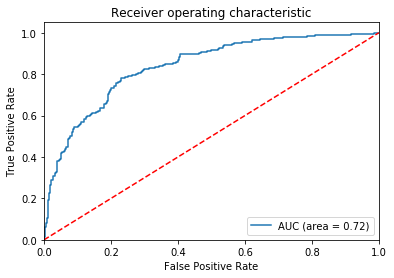

In [72]:
logic_roc_auc = roc_auc_score(y,loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='AUC (area = %0.2f)' % logic_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Model Tuning ( Model Doğrulama)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.30,
                                                   random_state=42)

In [73]:
loj_model = LogisticRegression(solver= "liblinear").fit(X_train,y_train) 

In [100]:
y_pred = loj_model.predict(X_test)

In [101]:
print(accuracy_score(y_test, y_pred))

0.7532467532467533


In [102]:
cross_val_score(loj_model,X_test,y_test,cv=10).mean()

0.7704710144927536

### KNN K-En Yakın Komşu 

In [103]:
# 1 nokta gözlem birimlerine uzaklığına bakılır. öklid olabilir
# k adet gözlem y değerinin en sık gözlenen tahmin edilen sınıf olur.

In [104]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
y = df["Outcome"]
X = df.drop(["Outcome"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.30,
                                                   random_state=42) # random_state göre böler aynı sonuçlar olsun diye.

#### Model & Tahmin

In [74]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)

In [114]:
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [115]:
y_pred = knn_model.predict(X_test)

In [116]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [117]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.75      0.76       151
          1       0.55      0.56      0.56        80

avg / total       0.69      0.69      0.69       231



#### Model Tuning

In [118]:
knn = KNeighborsClassifier()

In [119]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [120]:
knn_params={"n_neighbors":np.arange(1,50)}

In [121]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [123]:
knn_cv_model.best_score_

0.7486033519553073

In [124]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [75]:
knn_tuned = KNeighborsClassifier(n_neighbors = 11).fit(X_train,y_train)

In [129]:
y_pred = knn_tuned.predict(X_test)

In [130]:
accuracy_score(y_test, y_pred)

0.7316017316017316

In [131]:
knn_tuned.score(X_test,y_test)

0.7316017316017316

### Destek Vektör Makineleri (SVM)

In [132]:
# amaç iki sınf arasındaki ayrımı optimum olmasını sağlayacak hiper-düzlemi bulmaktır.

In [133]:
# şeker hastası 1 değil 0

In [134]:
# iki sınıf arasındaki ayrımı max(marjin aralığı) sağlayacak ayrımı yapan doğru,düzlem

In [135]:
# marjin hesaplamada hard veya soft toleranslı veya toleranssız

In [136]:
# Doğrusal olmayan SVM 

In [137]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.30,
                                                   random_state=42)

#### Model & Tahmin

In [76]:
svm_model = SVC(kernel = "linear").fit(X_train,y_train)

In [142]:
svm_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [143]:
y_pred = svm_model.predict(X_test)

In [144]:
accuracy_score(y_test,y_pred)

0.7445887445887446

#### Model Tuning

In [146]:
svm = SVC()

In [145]:
svm_params = {"C":np.arange(1,10),"kernel":["linear","rbf"]} 

In [148]:
# n_jobs =-1 işlemci full performans 
# verbose = 2 bilgileri gösterme

In [147]:
svm_cv_model = GridSearchCV(svm,svm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  7.2min finished


In [149]:
svm_cv_model.best_score_

0.7821229050279329

In [150]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [151]:
# final model

In [77]:
svm_tuned = SVC( C=2,kernel="linear").fit(X_train,y_train) # ceza parametresi 2

In [158]:
y_pred = svm_tuned.predict(X_test)

In [159]:
accuracy_score(y_test,y_pred)

0.7445887445887446

### Yapay Sinir Ağları

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.30,
                                                   random_state=42)

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(X_train)
X_train= scaler.transform(X_train)

In [48]:
scaler.fit(X_test)
X_test= scaler.transform(X_test)

#### Model & Tahmin

In [79]:
mlpc_model = MLPClassifier().fit(X_train,y_train)

In [14]:
mlpc_model.coefs_

[array([[-9.96951479e-02,  1.67370768e-02,  1.73435884e-02,
          1.63551961e-01,  9.79167997e-02, -5.41967802e-02,
          4.42786564e-02,  8.86802498e-02, -1.03030403e-01,
          7.02089508e-02,  5.20903692e-02, -1.90199295e-01,
         -1.34850009e-01,  5.68705515e-02, -7.50623519e-02,
          5.33068104e-02,  2.18712556e-01, -9.62626008e-03,
         -9.79874116e-02,  1.07873314e-01,  6.32250682e-02,
         -2.12387889e-01, -1.01560813e-01,  1.50541232e-01,
          7.75298804e-02,  8.41068188e-02, -8.41943179e-03,
         -1.73740877e-01,  2.35038407e-01,  2.64338462e-02,
         -1.96327209e-01, -6.81739841e-03, -7.36371015e-02,
          2.45411824e-01,  1.17826575e-01, -1.23990237e-02,
          5.13912007e-02,  1.49084081e-01, -1.34472287e-01,
         -2.19041965e-01,  1.09218880e-01, -5.82248289e-02,
          1.54497402e-01,  1.89515063e-02, -2.31229230e-01,
          1.47549663e-01,  2.33585045e-02, -7.03951690e-02,
         -1.86770642e-01,  7.29888884e-0

In [15]:
?mlpc_model

Type:        MLPClassifier
String form:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999 <...> True, solver='adam', tol=0.0001, validation_fraction=0.1,
           verbose=False, warm_start=False)
File:        c:\users\baydin\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - '

In [16]:
y_pred = mlpc_model.predict(X_test)

In [17]:
accuracy_score(y_test,y_pred)

0.645021645021645

### Model Tuning

In [18]:
#alpha ceza terimi

In [23]:
mlpc_params={"alpha":[1,5,0.1,0.01,0.03,0.005,0.0001],
            "hidden_layer_sizes":[(10,10),(100,100,100),(100,100),(3,5)]}

In [50]:
mlpc = MLPClassifier(solver = "lbfgs",activation="logistic")

In [51]:
mlpc_cv_model= GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:  2.4min finished


In [52]:
mlpc_cv_model

GridSearchCV(cv=10, error_score='raise',
       estimator=MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [1, 5, 0.1, 0.01, 0.03, 0.005, 0.0001], 'hidden_layer_sizes': [(10, 10), (100, 100, 100), (100, 100), (3, 5)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [53]:
mlpc_cv_model.best_params_

{'alpha': 1, 'hidden_layer_sizes': (3, 5)}

In [54]:
#finalmodel

In [80]:
mlpc_tuned=MLPClassifier(solver="lbfgs",activation="logistic",alpha=5,hidden_layer_sizes=(3,5)).fit(X_train,y_train)

In [56]:
y_pred = mlpc_tuned.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred)

0.7619047619047619

In [11]:
#yapay sinir ağlarında kullanılan aktivasyon 

### CART (Classification and Regression Tree)

In [13]:
#heterojen veri setlerini belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.30,
                                                   random_state=42)

#### Model & Tahmin

In [81]:
cart_model = DecisionTreeClassifier().fit(X_train,y_train)

In [18]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
y_pred = cart_model.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred) #ilkel hata

0.70995670995671

#### Model Tuning

In [24]:
cart = DecisionTreeClassifier()

In [29]:
cart_params = {"max_depth":[1,3,5,8,10],
               "min_samples_split": [2,3,5,10,20,50]}

In [30]:
cart_cv_model = GridSearchCV(cart,cart_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.7s finished


In [31]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [32]:
#final model

In [82]:
cart_tuned = DecisionTreeClassifier(max_depth=5,min_samples_split=20).fit(X_train,y_train)

In [34]:
y_pred=cart_tuned.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred) #doğruluk oranı artmış oldu

0.7532467532467533

### Random Forest

In [36]:
# Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

In [38]:
# bagging: temeli bootstrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği taminlerin bir araya getirilerek değerlendirilmesine dayanır.

In [39]:
#Random Forest temelini Bagging oluşturur.

In [41]:
# Bagging ile Random Subspace yöntemlerinin birleşimi ile oluşmuştur.
# En başarılı yöntemlerden biridir.
# Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile değişkenler random subspace yöntemi ile seçilir.
# karar ağacının her bir düğümünde en iyi dallara ayırıcı değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.
# Ağaç oluşturmada veri setinin 2/3 ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirmesi ve değişken önemin belirlenmesi için kullanılır.
# her düğüm noktasında rastgele dğişken seçimi yapılır.(regrsyonda p/3, sınıflama'da karakök p)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.30,
                                                   random_state=42)

#### Model & Tahmin

In [83]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [48]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

#### Model Tuning

In [55]:
rf=RandomForestClassifier()

In [56]:
rf_params = {"n_estimators":[100,200,500,1000],
             "max_features":[3,5,7],
             "min_samples_split":[2,5,10,20]} #dallanma çok olunca öğreniyor ama genelleme oluyor.

In [58]:
rf_cv_model = GridSearchCV(rf,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  8.2min finished


In [59]:
rf_cv_model.best_params_

{'max_features': 7, 'min_samples_split': 5, 'n_estimators': 200}

In [60]:
#final model

In [84]:
rf_tuned = RandomForestClassifier(max_features = 8,
                                  min_samples_split=5,
                                  n_estimators=500).fit(X_train,y_train)

In [62]:
y_pred=rf_tuned.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred)

0.7445887445887446

In [66]:
#değişken önem düzeyleri

In [67]:
rf_tuned

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
rf_tuned.feature_importances_

array([0.04891587, 0.37776555, 0.07255641, 0.04610797, 0.04917941,
       0.1609032 , 0.10980259, 0.13476899])

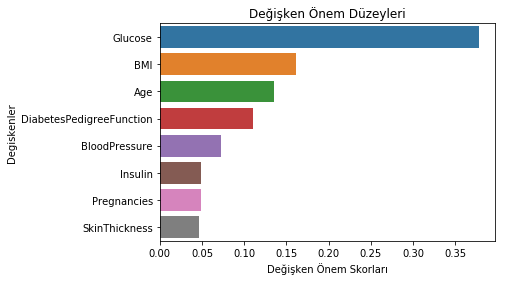

In [65]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Degiskenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

### Gradient Boosting Machines (GBM)

In [11]:
# AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genlleştirilmiş versiyonudur.
# Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.

In [12]:
# tek bir tahminsel model formunda olan modeller serisi oluşturur.
# Boosting + Gradient Descent

### Model & Tahmin

In [85]:
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)

In [17]:
gbm_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [18]:
y_pred = gbm_model.predict(X_test)

In [19]:
accuracy_score(y_test,y_pred)

0.7489177489177489

#### Model Tuning

In [20]:
gbm= GradientBoostingClassifier()

In [21]:
gbm_params={"learning_rate":[0.1,0.01,0.001,0.05],
            "n_estimators":[100,300,500,1000],
            "max_depth":[2,3,5,8]}

In [23]:
gbm_cv_model=GridSearchCV(gbm, gbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  4.5min finished


In [24]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [25]:
#final model

In [86]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.01,
                                       max_depth=5,
                                       n_estimators=500).fit(X_train,y_train)

In [27]:
y_pred=gbm_tuned.predict(X_test)

In [28]:
accuracy_score(y_test,y_pred)

0.7402597402597403

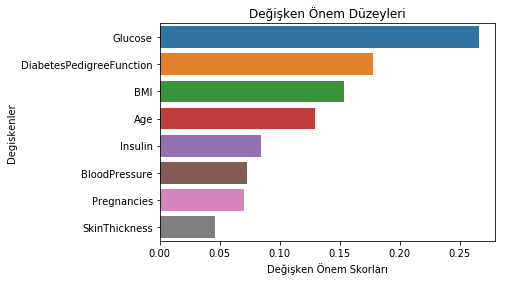

In [29]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Degiskenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

### XGBoost

In [30]:
## eXtreme Gradient Boosting

In [31]:
#ölçeklenebilir,hızlı,tahmin başarısı yüksektir,bir çok kaggle yarışmasında başarısını kanıtlamıştır.

#### Model & Tahmin

In [32]:
!pip install xgboost

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [87]:
from xgboost import XGBClassifier

In [88]:
xgb_model = XGBClassifier().fit(X_train,y_train)

[11:53:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\BAYDIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [18]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_bynode=1, c <...> ple=1, tree_method='exact',
           use_label_encoder=True, validate_parameters=1, verbosity=None)
File:        c:\users\baydin\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.
    use_label_encoder : bool
        (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new code,
        we recommend that you set this parameter to False.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding lea

In [19]:
y_pred = xgb_model.predict(X_test)

C:\Users\BAYDIN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:
accuracy_score(y_test,y_pred)

0.7359307359307359

#### Model Tuning

In [21]:
xgb = XGBClassifier()

In [22]:
xgb_params={"n_estimators":[100,500,1000],
            "subsample":[0.6,0.8,1],
            "max_depth":[3,5,7],
            "learning_rate":[0.1,0.001,0.01]}

In [23]:
xgb_cv_model= GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  6.3min finished
C:\Users\BAYDIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

In [89]:
xgb_tuned=xgb=XGBClassifier(learning_rate=0.001,
                           max_depth=7,
                           n_estimators=500,
                           subsample=0.6).fit(X_train,y_train)

C:\Users\BAYDIN\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [26]:
y_pred = xgb_tuned.predict(X_test)

C:\Users\BAYDIN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [27]:
accuracy_score(y_test,y_pred)

0.7575757575757576

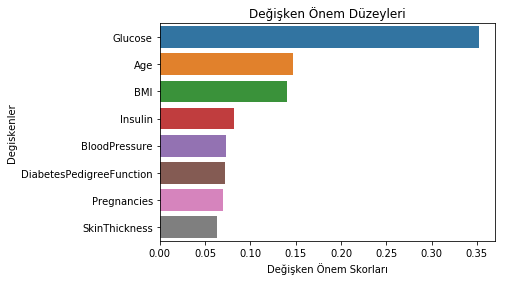

In [28]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Degiskenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

### Light GBM

In [11]:
# XGBoost un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.

In [12]:
# daha performanslı, lewel-wise büyüme stratejisi yerine leaf-wise büyüme stratejisi izler
# yani Breadth-frist search(BFS) (genişemesine )yerine depth-first search (DFS) (derinlemesine) , derinleme arama yapar

#### Model & Tahmin

In [13]:
!pip install lightgbm

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [15]:
from lightgbm import LGBMClassifier

In [19]:
lgbm_model = LGBMClassifier().fit(X_train,y_train)

In [20]:
?lgbm_model

Type:           LGBMClassifier
String form:   
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
           importance_ <...> , reg_lambda=0.0, silent=True,
           subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
File:           c:\users\baydin\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` met

In [21]:
y_pred = lgbm_model.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)

0.7229437229437229

#### Model Tuning

In [23]:
lgbm = LGBMClassifier()

In [24]:
lgbm_params={ "learning_rate":[0.001,0.01,0.1],
             "n_estimators":[200,500,100],
             "max_depth":[1,2,35,8]}

In [26]:
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   43.7s finished


In [27]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [28]:
lgbm_tuned = LGBMClassifier(learning_rate=0.01,
             n_estimators=500,
             max_depth=1).fit(X_train,y_train)

In [29]:
y_pred = lgbm_tuned.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.7575757575757576

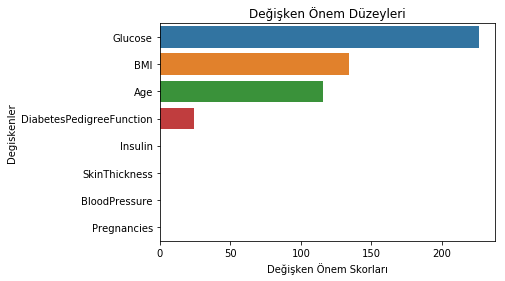

In [31]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Degiskenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

### CatBoost

In [33]:
# Kategorik değişkenler ile otomatik olarak mücadele edebilen,hızlı,başarılı bir diğer GBM türevi ,Yandex 2017

In [34]:
# Kategorik değişken desteği sağlar, Hızlı ve Ölçeklenebilir CPU desteği, daha Başarılı Tahminler

In [35]:
# hızlı traini hızlı tahmin, 

In [36]:
# Rusynın ilk açık kaynak kodlu , başarılı ML çalışması

#### Model & Tahmin

In [37]:
!pip install catboost

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [39]:
from catboost import CatBoostClassifier

In [41]:
catb_model = CatBoostClassifier().fit(X_train,y_train,verbose=False) # çıktıda her iteraasyona bilgi vermesini istemezsek verbose false yaparız.

In [44]:
?catb_model

Type:            CatBoostClassifier
String form:     <catboost.core.CatBoostClassifier object at 0x0000027F638BE0B8>
File:            c:\users\baydin\anaconda3\lib\site-packages\catboost\core.py
Docstring:       <no docstring>
Class docstring: CatBoost model. Contains training, prediction and evaluation methods.
Init docstring: 
Initialize the CatBoost.

Parameters
----------
params : dict
    Parameters for CatBoost.
    If  None, all params are set to their defaults.
    If  dict, overriding parameters present in dict.


In [42]:
y_pred = catb_model.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred) # ilk ilkel test hatamız

0.7402597402597403

#### Model Tuning

In [48]:
catb = CatBoostClassifier(verbose=False)

In [50]:
catb_params = {"iterations":[200,500,100],
               "learning_rate":[0.1,0.03,0.1],
              "depth":[4,5,8]}

In [51]:
catb_cv_model = GridSearchCV(catb,catb_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.6min finished


In [52]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 200, 'learning_rate': 0.03}

In [60]:
catb_tuned = CatBoostClassifier(iterations=200,
                               learning_rate=0.03,
                               depth=5).fit(X_train,y_train)

0:	learn: 0.6739337	total: 2.5ms	remaining: 499ms
1:	learn: 0.6601129	total: 5.1ms	remaining: 505ms
2:	learn: 0.6480405	total: 7.33ms	remaining: 481ms
3:	learn: 0.6391601	total: 9.6ms	remaining: 471ms
4:	learn: 0.6277183	total: 11.4ms	remaining: 445ms
5:	learn: 0.6182362	total: 13.5ms	remaining: 437ms
6:	learn: 0.6068650	total: 15.6ms	remaining: 429ms
7:	learn: 0.5934317	total: 17.3ms	remaining: 415ms
8:	learn: 0.5804827	total: 19.3ms	remaining: 410ms
9:	learn: 0.5727000	total: 21.4ms	remaining: 407ms
10:	learn: 0.5680795	total: 23.4ms	remaining: 403ms
11:	learn: 0.5579472	total: 25.2ms	remaining: 395ms
12:	learn: 0.5489251	total: 26.9ms	remaining: 387ms
13:	learn: 0.5419788	total: 29.5ms	remaining: 392ms
14:	learn: 0.5346596	total: 31.5ms	remaining: 389ms
15:	learn: 0.5292193	total: 34.6ms	remaining: 398ms
16:	learn: 0.5232013	total: 36.8ms	remaining: 396ms
17:	learn: 0.5172906	total: 39.1ms	remaining: 396ms
18:	learn: 0.5125814	total: 41.1ms	remaining: 392ms
19:	learn: 0.5069509	tota

In [61]:
y_pred = catb_tuned.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred)

0.7489177489177489

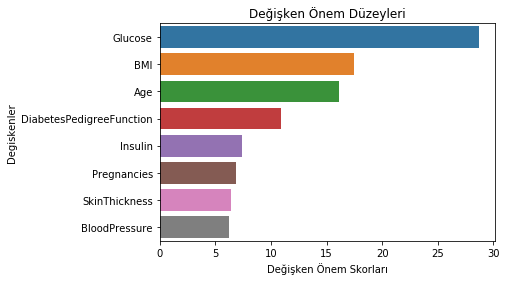

In [63]:
feature_imp = pd.Series(catb_tuned.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Degiskenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

### Tüm Modellerin Karşılaştırılması

In [91]:
modeller = [
    knn_tuned,
    loj_model,
    svm_tuned,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned]

sonuc=[]
sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test,y_pred)
    sonuc=pd.DataFrame([[isimler,dogruluk*100]],columns=["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

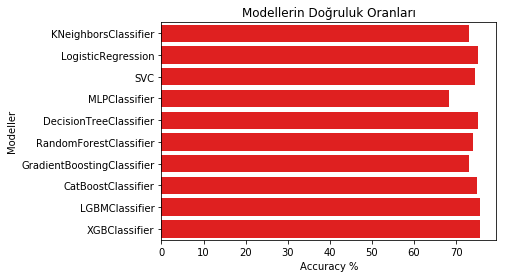

In [92]:
sns.barplot(x='Accuracy', y='Modeller',data=sonuclar,color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

In [93]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,73.160173
0,LogisticRegression,75.324675
0,SVC,74.458874
0,MLPClassifier,68.398268
0,DecisionTreeClassifier,75.324675
0,RandomForestClassifier,74.025974
0,GradientBoostingClassifier,73.160173
0,CatBoostClassifier,74.891775
0,LGBMClassifier,75.757576
0,XGBClassifier,75.757576


#### Daha Başka Ne Yapılabilir?

1. Değişken türetme/ değişken mühendisliği
2. Değişken seçme
3. Otomatik ML
4. Model deployment